In [2]:
library(tidyverse) # readr, ggplot, dplyr, ...
library(gridExtra) # Arrangning ggplots
library(readxl)    # Loading excel
library(repr)      # Resizing the plots in jupyter
library(rugarch)   # For ARCH and GARCH models
library(dynlm)     # Lagged linear models
library(urca)      # Dick Fuller test
library(car)       # Linear hyphothesis testing
library(tseries)   # adf-test
library(vars)      # VAR models
library(zoo)       # Convert quarters to date
library(expm)      # Matrix calculations 
library(forecast)  

options(repr.plot.width=8, repr.plot.height=2.2)
setwd("C:/Users/larsn/Documents/GitHub/Applied-Econometric-Time-Series-WE")

# Excercise 2

In [16]:
coint <- read_excel("Data/Coint6.xls")
head(coint)

y,z,w
-1.80156,-0.4969500,-1.79957
-2.27002,-0.1490799,-2.36988
-2.21743,0.1181677,-2.12782
-2.36609,0.2260346,-2.30212
-2.06364,0.1829068,-1.93444
-2.17761,0.1754546,-1.62233


### Reproduction of graph on page 365

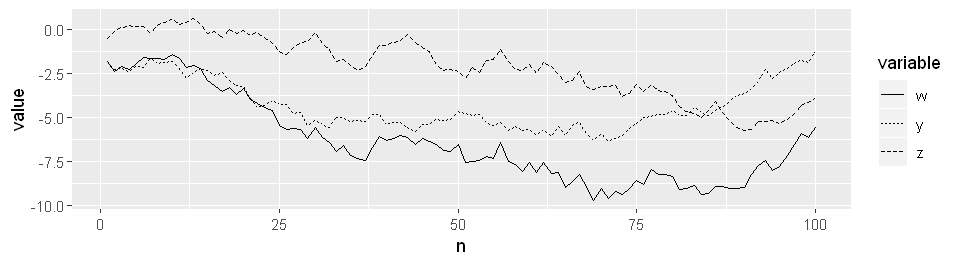

In [40]:
coint2 <- coint
coint2$n <- c(1:nrow(coint2))
coint2 %>%
  gather(variable, value, -n) %>%
  ggplot(aes(n, value, linetype=variable)) + 
    geom_line()

### Reproduction of results on page 366

In [24]:
reg_y <- lm(y ~ z + w, data=coint)
reg_z <- lm(z ~ y + w, data=coint)
reg_w <- lm(w ~ y + z, data=coint)
reg_y
reg_z
reg_w


Call:
lm(formula = y ~ z + w, data = coint)

Coefficients:
(Intercept)            z            w  
   -0.04843     -0.92731      0.97688  



Call:
lm(formula = z ~ y + w, data = coint)

Coefficients:
(Intercept)            y            w  
    0.05896     -1.01082      1.02549  



Call:
lm(formula = w ~ y + z, data = coint)

Coefficients:
(Intercept)            y            z  
   -0.08524      0.99007      0.95347  


In [50]:
y <- coint$y
z <- coint$z
w <- coint$w
dy <- diff(coint$y)
dz <- diff(coint$z)
dw <- diff(coint$w)

dynlm(dy ~ L(y[-1])+0)
dynlm(dz ~ L(z[-1])+0)
dynlm(dw ~ L(w[-1])+0)

dynlm(dy ~ L(y[-1]) + L(dy) + L(dy,2) + L(dy,3) + L(dy,4))$coefficient
#dynlm(dz ~ L(z[-1]), data=coint)$coefficient
#dynlm(dw ~ L(w[-1]), data=coint)$coefficient


Time series regression with "numeric" data:
Start = 1, End = 99

Call:
dynlm(formula = dy ~ L(y[-1]) + 0)

Coefficients:
L(y[-1])  
  0.0022  



Time series regression with "numeric" data:
Start = 1, End = 99

Call:
dynlm(formula = dz ~ L(z[-1]) + 0)

Coefficients:
L(z[-1])  
 0.01837  



Time series regression with "numeric" data:
Start = 1, End = 99

Call:
dynlm(formula = dw ~ L(w[-1]) + 0)

Coefficients:
L(w[-1])  
0.005097  


(Intercept)      L(y[-1])         L(dy)      L(dy, 2)      L(dy, 3) 
-3.589946e-17 -8.012943e-18  1.000000e+00            NA            NA 
     L(dy, 4) 
           NA

In [27]:
res_y <- reg_y$residuals
dres_y <- diff(res_y)
dynlm(dres_y ~ L(res_y[-1]))


Time series regression with "numeric" data:
Start = 1, End = 99

Call:
dynlm(formula = dres_y ~ L(res_y[-1]))

Coefficients:
 (Intercept)  L(res_y[-1])  
    0.008704      0.457770  


# Excercise 4 (a,b,c)

# Excercise 9

# Excercise 10